In [1]:
import numpy as np
print("numpy version: {}".format(np.__version__))
import pandas as pd 
print("pandas version: {}".format(pd.__version__))
import seaborn as sns
print("seaborn version: {}".format(sns.__version__))
import matplotlib
import matplotlib.pyplot as plt
print("matplotlib version: {}".format(matplotlib.__version__))
import sklearn as sl
print("scikit-learn: {}".format(sl.__version__))
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

numpy version: 1.17.4
pandas version: 0.25.3
seaborn version: 0.9.0
matplotlib version: 3.1.2
scikit-learn: 0.21.3


In [2]:
from sklearn.model_selection import train_test_split

### import data

In [3]:
!ls

ds_internship_task  internship_task.ipynb  __MACOSX


In [4]:
!ls ds_internship_task/

insurance.csv  readme.txt


In [5]:
!cat ds_internship_task/readme.txt

Health Insurance Dataset

Task:
- Build a model that predicts "charges" for a given person based on their features.
- Evaluate the quality of your model.
- Identify the factors with the highest impact.

Expected result - link to a GitHub repo with:
- Code for the solution (any programming language, Python or R preferred).
- Brief summary of the solution*: what did you do, which steps did you make, how to interpret the results.

* Both code and solution can be a single report file, e.g. .ipynb or .rmd


In [6]:
data = pd.read_csv('ds_internship_task/insurance.csv')

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
age         1338 non-null int64
sex         1338 non-null object
bmi         1338 non-null float64
children    1338 non-null int64
smoker      1338 non-null object
region      1338 non-null object
charges     1338 non-null float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [8]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [9]:
data.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

There are 4 quantitive variables and 3 categorical variables.

quantitive - age, bmi, children, charges. 

charges - target variable

categorical - sex, smoker, region

In [10]:
target = 'charges'

In [11]:
data[target].describe()

count     1338.000000
mean     13270.422265
std      12110.011237
min       1121.873900
25%       4740.287150
50%       9382.033000
75%      16639.912515
max      63770.428010
Name: charges, dtype: float64

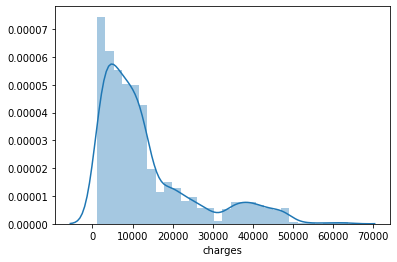

In [12]:
sns.distplot(data[target])

In [13]:
print(f"skewness: {data[target].skew()}")
print(f"kurtosis: {data[target].kurt()}")

skewness: 1.5158796580240388
kurtosis: 1.6062986532967907


In [14]:
print(f"skewness: {np.log(data[target]).skew()}")
print(f"kurtosis: {np.log(data[target]).kurt()}")

skewness: -0.09009752473024583
kurtosis: -0.6366666331104724


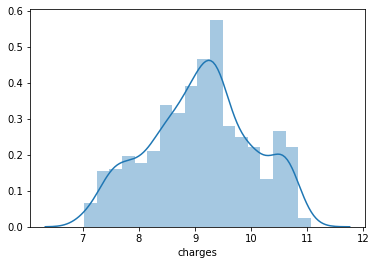

In [15]:
sns.distplot(np.log(data[target]))

In [16]:
def scatter_plot(var, target=target):
    d = pd.concat([data[target], data[var]], axis=1)
    d.plot.scatter(x=var, y=target)

In [17]:
def box_plot(var, target=target):
    d = pd.concat([data[target], data[var]], axis=1)
    f, ax = plt.subplots(figsize=(8, 6))
    fig = sns.boxplot(x=var, y=target, data=d)

In [18]:
def descriptive_stats(var, target=target):
    d = pd.DataFrame(index=data.describe().index, columns=np.unique(data[var]))
    for x in np.unique(data[var]):
        d[x] = data[target][data[var] == x].describe()
    return d

In [19]:
def corrmat_plot(n, target=target):
    corrmat = data.corr()
    cols = corrmat.nlargest(n, target)[target].index
    hm = sns.heatmap(corrmat, cbar=True, annot=True, square=True, 
                     fmt='.2f', annot_kws={'size': 10}, 
                     yticklabels=cols.values, xticklabels=cols.values)
    plt.show()

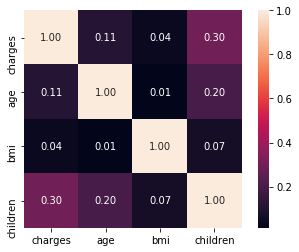

In [20]:
corrmat_plot(len(data))

Children have the biggest impact on changes, then age, then bmi.

quantitive -> quantitive


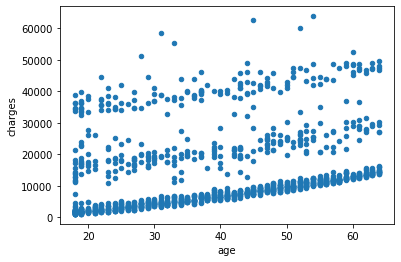

In [21]:
scatter_plot('age')

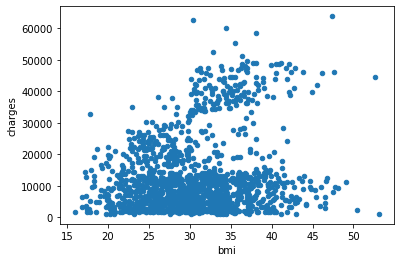

In [22]:
scatter_plot('bmi')

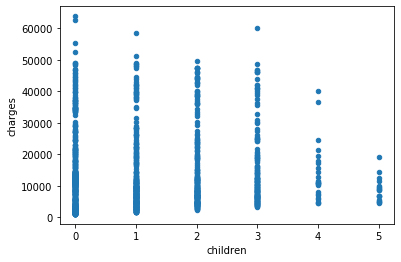

In [23]:
scatter_plot('children')

In [24]:
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


categorical -> quantitive

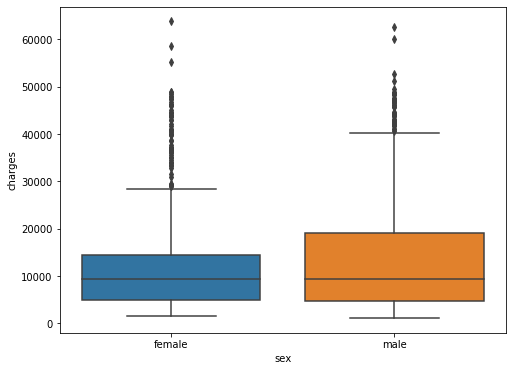

In [25]:
box_plot('sex')

In [26]:
descriptive_stats('sex')

,female,male
count,662.000000,676.000000
mean,12569.578844,13956.751178
std,11128.703801,12971.025915
min,1607.510100,1121.873900
25%,4885.158700,4619.134000
50%,9412.962500,9369.615750
75%,14454.691825,18989.590250
max,63770.428010,62592.873090


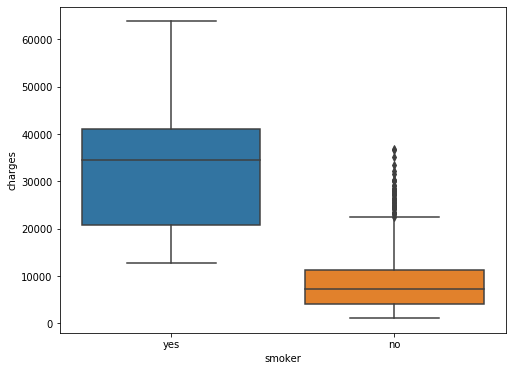

In [27]:
box_plot('smoker')

In [28]:
descriptive_stats('smoker')

,no,yes
count,1064.000000,274.000000
mean,8434.268298,32050.231832
std,5993.781819,11541.547176
min,1121.873900,12829.455100
25%,3986.438700,20826.244213
50%,7345.405300,34456.348450
75%,11362.887050,41019.207275
max,36910.608030,63770.428010


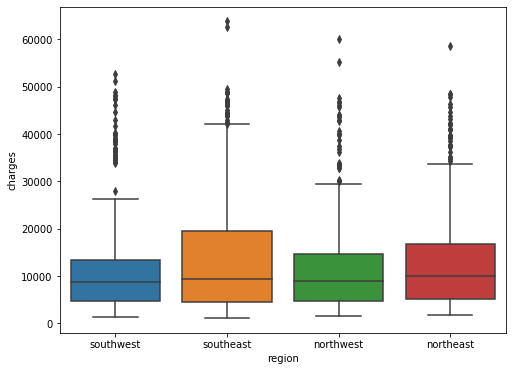

In [29]:
box_plot('region')

In [30]:
descriptive_stats('region')

,northeast,northwest,southeast,southwest
count,324.000000,325.000000,364.000000,325.000000
mean,13406.384516,12417.575374,14735.411438,12346.937377
std,11255.803066,11072.276928,13971.098589,11557.179101
min,1694.796400,1621.340200,1121.873900,1241.565000
25%,5194.322288,4719.736550,4440.886200,4751.070000
50%,10057.652025,8965.795750,9294.131950,8798.593000
75%,16687.364100,14711.743800,19526.286900,13462.520000
max,58571.074480,60021.398970,63770.428010,52590.829390


How we can see sex and region haven't got any impact on charges, but smoker did.

In [31]:
data['sex'] = data['sex'].apply(lambda x: 0 if x == 'female' else 1)
data['smoker'] = data['smoker'].apply(lambda x: 0 if x == 'no' else 1)

In [32]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,southwest,16884.92400
1,18,1,33.770,1,0,southeast,1725.55230
2,28,1,33.000,3,0,southeast,4449.46200
3,33,1,22.705,0,0,northwest,21984.47061
4,32,1,28.880,0,0,northwest,3866.85520


In [33]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,southwest,16884.92400
1,18,1,33.770,1,0,southeast,1725.55230
2,28,1,33.000,3,0,southeast,4449.46200
3,33,1,22.705,0,0,northwest,21984.47061
4,32,1,28.880,0,0,northwest,3866.85520


In [34]:
data['has_no_child'] = 1
data['has_no_child'].loc[data['children'] > 0] = 0

In [35]:
data['bmi/age'] = data['bmi'] / data['age']

In [36]:
data['children/age'] = data['children'] / data['age']

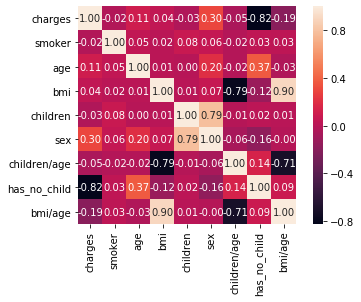

In [37]:
corrmat_plot(len(data))

In [38]:
data['region'] = data['region'].astype('category')
data['region_cat'] = data['region'].cat.codes
data.drop(['region'], inplace=True, axis=1)

In [39]:
from sklearn.preprocessing import MinMaxScaler
from sklearn import linear_model
from sklearn.metrics import mean_squared_error

In [40]:
y = data[target]
X = data.drop([target], axis=1)

In [41]:
X.shape, y.shape

((1338, 9), (1338,))

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.3)

In [43]:
scaler = MinMaxScaler().fit(X_train)

In [44]:
X_train_scaled = scaler.transform(X_train)

In [45]:
alphas = [0.01, 0.03, 0.1, 0.3, 1, 3, 10]
for alpha in alphas:
    ridge = linear_model.Ridge(alpha=alpha)
    ridge.fit(X_train_scaled, y_train)
    X_test_scaled = scaler.transform(X_test)
    pred_ridge = ridge.predict(X_test_scaled)
    tmp_mean = mean_squared_error(y_test, pred_ridge)
    print(f'alpha={alpha}\nR^2 is: {ridge.score(X_test_scaled, y_test)}\nRMSE is: {tmp_mean}')
    print('-' * 30)

alpha=0.01
R^2 is: 0.7721023567858726
RMSE is: 33415334.20697392
------------------------------
alpha=0.03
R^2 is: 0.7720909388029881
RMSE is: 33417008.360811908
------------------------------
alpha=0.1
R^2 is: 0.772050662756409
RMSE is: 33422913.808266263
------------------------------
alpha=0.3
R^2 is: 0.7719347133039298
RMSE is: 33439914.816486724
------------------------------
alpha=1
R^2 is: 0.7715433293646278
RMSE is: 33497301.215707768
------------------------------
alpha=3
R^2 is: 0.7704538894451481
RMSE is: 33657039.58989371
------------------------------
alpha=10
R^2 is: 0.7645719010537576
RMSE is: 34519482.06682263
------------------------------


In [46]:
alphas = [0.01, 0.03, 0.1, 0.3, 1, 3, 10]
for alpha in alphas:
    ridge = linear_model.Lasso()
    ridge.fit(X_train_scaled, y_train)
    X_test_scaled = scaler.transform(X_test)
    pred_ridge = ridge.predict(X_test_scaled)
    tmp_mean = mean_squared_error(y_test, pred_ridge)
    print(f'alpha={alpha}\nR^2 is: {ridge.score(X_test_scaled, y_test)}\nRMSE is: {tmp_mean}')
    print('-' * 30)

alpha=0.01
R^2 is: 0.7720555556425102
RMSE is: 33422196.392228086
------------------------------
alpha=0.03
R^2 is: 0.7720555556425102
RMSE is: 33422196.392228086
------------------------------
alpha=0.1
R^2 is: 0.7720555556425102
RMSE is: 33422196.392228086
------------------------------
alpha=0.3
R^2 is: 0.7720555556425102
RMSE is: 33422196.392228086
------------------------------
alpha=1
R^2 is: 0.7720555556425102
RMSE is: 33422196.392228086
------------------------------
alpha=3
R^2 is: 0.7720555556425102
RMSE is: 33422196.392228086
------------------------------
alpha=10
R^2 is: 0.7720555556425102
RMSE is: 33422196.392228086
------------------------------
